##Подключение гугл диска

In [26]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Первая нейросеть

##Импорт необходимых библиотек

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
import matplotlib.pyplot as plt

##Чтение файла

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv')
data['Category'] = data['Category'].replace({'spam': 1, 'ham': 0})

##Разделение на тренировочный и тестовый датасеты

In [29]:
train_data, test_data = train_test_split(data, test_size=0.2,random_state=8)

##Токенизация текста

In [30]:
tokenizer = Tokenizer(num_words=10000)

In [31]:
trainText = train_data['Message'].tolist()
testText = test_data['Message'].tolist()
tokenizer.fit_on_texts(trainText)


###Проверка первых самых частых слов

In [32]:
items = list(tokenizer.word_index.items())
for i in range(0,5):
  print(items[i])


('i', 1)
('to', 2)
('you', 3)
('a', 4)
('the', 5)


##Замена слов на индексы

In [33]:
train_sequences = tokenizer.texts_to_sequences(trainText)
test_sequences = tokenizer.texts_to_sequences(testText)

Приведение последовательностей к одной длине

In [34]:
max_sequence_length = 100 # Максимальная длина последовательности
train_sequences_padded = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_sequences_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)

Преобразование в массивы numpy и проверка формата

In [35]:
train_sequences_np = np.array(train_sequences_padded)
test_sequences_np = np.array(test_sequences_padded)
print(train_sequences_np)
print(train_sequences_np.shape)


[[   0    0    0 ...  146  680  113]
 [   0    0    0 ...  104    4  466]
 [   0    0    0 ...   43   42 1454]
 ...
 [   0    0    0 ...   14   11  912]
 [   0    0    0 ... 1120 1071 2085]
 [   0    0    0 ...    2 1383 1132]]
(4457, 100)


Приведение к типу bag of words

In [36]:
train_sequences_list = train_sequences_np.tolist()
xTrain_bow = tokenizer.sequences_to_matrix(train_sequences_list, mode='binary')
print(xTrain_bow.shape)


(4457, 10000)


In [37]:

test_sequences_list = test_sequences_np.tolist()
xTest_bow = tokenizer.sequences_to_matrix(test_sequences_list, mode='binary')
print(xTest_bow.shape)


(1115, 10000)


##Создание архитектуры модели

In [38]:
model1 = Sequential()
model1.add(Dense(400, input_dim = 10000 , activation="relu"))
model1.add(Dropout(0.25))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 400)               4000400   
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 400)               1600      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 1)                 401       
                                                                 
Total params: 4002401 (15.27 MB)
Trainable params: 4001601 (15.26 MB)
Non-trainable params: 800 (3.12 KB)
_________________________________________________________________


##Тестирование и отображение результатов

Epoch 1/10
35/35 [==============================] - 7s 173ms/step - loss: 0.2794 - accuracy: 0.8793 - val_loss: 0.3630 - val_accuracy: 0.9740
Epoch 2/10
35/35 [==============================] - 7s 201ms/step - loss: 0.0440 - accuracy: 0.9888 - val_loss: 0.2453 - val_accuracy: 0.9758
Epoch 3/10
35/35 [==============================] - 5s 157ms/step - loss: 0.0118 - accuracy: 0.9989 - val_loss: 0.1889 - val_accuracy: 0.9776
Epoch 4/10
35/35 [==============================] - 3s 95ms/step - loss: 0.0065 - accuracy: 0.9993 - val_loss: 0.1502 - val_accuracy: 0.9794
Epoch 5/10
35/35 [==============================] - 3s 95ms/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.1195 - val_accuracy: 0.9812
Epoch 6/10
35/35 [==============================] - 3s 91ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0956 - val_accuracy: 0.9848
Epoch 7/10
35/35 [==============================] - 6s 158ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0759 - val_accuracy: 0.9857
Epoch 8/1

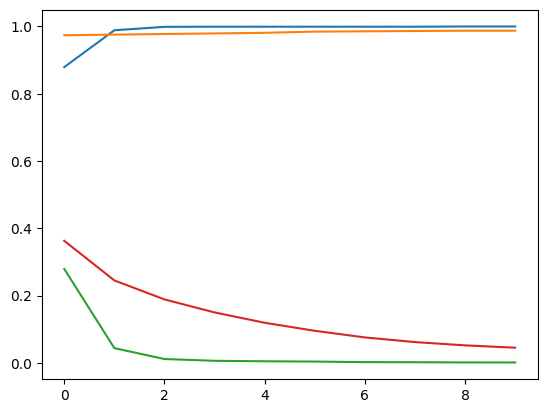

In [39]:
import matplotlib.pyplot as plt

history = model1.fit(xTrain_bow,
                     train_data['Category'],
                     epochs=10,
                     batch_size=128,
                     validation_data=(xTest_bow, test_data['Category']))


plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')

plt.plot(history.history['loss'], label='Значение функции потерь на обучающем наборе')
plt.plot(history.history['val_loss'], label='Значение функции потерь на проверочном наборе')




#Вторая Нейросеть


##Чтение Файла

In [ ]:
data_new = pd.read_csv('/content/drive/MyDrive/category.csv', encoding = 'cp1251', delimiter = ';')
print(data_new.head())

  Категория                                          Сообщение
0    Работа  Здравствуйте коллеги. Хочу напомнить о нашем п...
1    Работа  Приветствую всех.У меня возникли некоторые тру...
2    Работа  Привет всем! Я хотел бы поделиться с вами посл...
3    Работа  Привет всем! Мы завершили первый этап проекта ...
4    Работа  Добрый день коллеги! Мы приближаемся к заверше...


##Удаление предлогов и специальных символов

In [48]:
prepositions = ['по', 'о', 'у', 'при', 'пре', 'до', 'на', 'Привет', 'в']
data_new['Сообщение'] = data_new['Сообщение'].str.replace(r'\r|\n|\t', '', regex=True)
data_new['Сообщение'] = data_new['Сообщение'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in prepositions]))


##Приведение категорий к числовому формату

In [49]:
data_new['Категория'], unique = pd.factorize(data_new['Категория'])
print(data_new.head())

   Категория                                          Сообщение
0          0  Здравствуйте коллеги. Хочу напомнить нашем пре...
1          0  Приветствую всех.У меня возникли некоторые тру...
2          0  Привет всем! Я хотел бы поделиться с вами посл...
3          0  Привет всем! Мы завершили первый этап проекта ...
4          0  Добрый день коллеги! Мы приближаемся к заверше...


##Всё то же что и в предыдущей модели, токенизация, разделение на два обучающий и тестовый набор, приведение к виду bag of words

In [50]:
train_data1, test_data1 = train_test_split(data_new,  test_size=0.2, random_state=10) # Разделение на тестовый и не тестовый датасет
tokenizer = Tokenizer()
train_text1 = train_data1['Сообщение'].tolist()
test_text1 = test_data1['Сообщение'].tolist()
tokenizer.fit_on_texts(train_text1) # Создание словаря
train_sequences1 = tokenizer.texts_to_sequences(train_text1)
test_sequences1 = tokenizer.texts_to_sequences(test_text1)
max_sequence_length = 100
train_sequences_padded1 = pad_sequences(train_sequences1, maxlen=max_sequence_length) # Приведеие к одинаковой длине
test_sequences_padded1 = pad_sequences(test_sequences1, maxlen=max_sequence_length)
train_sequences_np1 = np.array(train_sequences_padded1)
test_sequences_np1 = np.array(test_sequences_padded1)
print(train_sequences_np1)
print(train_sequences_np1.shape)
train_sequences_list1 = train_sequences_np1.tolist()
xTrain_bow1 = tokenizer.sequences_to_matrix(train_sequences_list1, mode='binary') # Приведеие к типу bag of words.
print(xTrain_bow1.shape)
test_sequences_list1 = test_sequences_np1.tolist()
xTest_bow1 = tokenizer.sequences_to_matrix(test_sequences_list1, mode='binary')
print(xTest_bow1.shape)
yTrain = to_categorical(train_data1['Категория'])
yTest = to_categorical(test_data1['Категория'])



[[   0    0    0 ...  370  191  371]
 [   0    0    0 ...    1   76  200]
 [   0    0    0 ...  390  391  392]
 ...
 [   0    0    0 ...   39  128  129]
 [   0    0    0 ...   12   37  364]
 [   0    0    0 ...  360 1133  171]]
(76, 100)
(76, 1134)
(20, 1134)


##Создаём архитектуру модели

In [51]:
epochs = 10

print(u'Собираем модель...')
model = Sequential()
model.add(Dense(100, input_shape=(1134,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



print(model.summary())

Собираем модель...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               113500    
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 4)                 404       
                                                                 
 activation_5 (Activation)   (None, 4)                 0         
                                                                 
Total params: 113904 (444.94 KB)
Trainable params: 113904 (444.94 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________________________________

##Обучаем нейросеть

In [52]:
history = model.fit(xTrain_bow1, yTrain,
                    batch_size=32,
                    epochs=10,
                    validation_data=(xTest_bow1, yTest))


Epoch 1/10
3/3 [==============================] - 1s 104ms/step - loss: 1.4017 - accuracy: 0.3158 - val_loss: 1.3532 - val_accuracy: 0.4000
Epoch 2/10
3/3 [==============================] - 0s 47ms/step - loss: 1.2163 - accuracy: 0.6184 - val_loss: 1.2690 - val_accuracy: 0.5500
Epoch 3/10
3/3 [==============================] - 0s 36ms/step - loss: 1.0459 - accuracy: 0.9211 - val_loss: 1.1909 - val_accuracy: 0.7000
Epoch 4/10
3/3 [==============================] - 0s 35ms/step - loss: 0.8912 - accuracy: 0.9868 - val_loss: 1.1127 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 0s 31ms/step - loss: 0.7830 - accuracy: 0.9868 - val_loss: 1.0361 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - 0s 27ms/step - loss: 0.6576 - accuracy: 1.0000 - val_loss: 0.9626 - val_accuracy: 0.9500
Epoch 7/10
3/3 [==============================] - 0s 37ms/step - loss: 0.5599 - accuracy: 1.0000 - val_loss: 0.8917 - val_accuracy: 0.9500
Epoch 8/10
3/3 [==========

##Отображение результатов

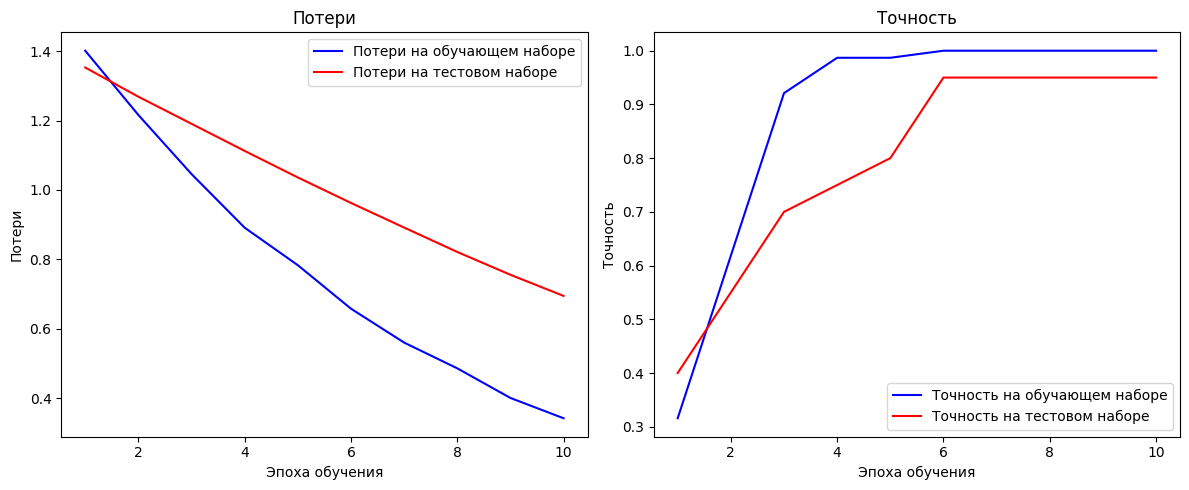

In [53]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b-', label='Потери на обучающем наборе')
plt.plot(epochs, val_loss_values, 'r-', label='Потери на тестовом наборе')
plt.title('Потери')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'b-', label='Точность на обучающем наборе')
plt.plot(epochs, val_accuracy_values, 'r-', label='Точность на тестовом наборе')
plt.title('Точность')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()


